In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('capao2022_limpo.csv')

In [38]:
df.head(200)

,Unnamed: 0,ITEM,DESCRICAO,ENDERECO,NUMERO,BAIRRO,CIDADE,ESTADO,AREA,QUARTOS,BANHEIROS,VAGAS,PRECO
0,0,0,"Apartamento com 4 Quartos à Venda, 191m²",Avenida Beira Mar,823,Zona Nova,Capão da Canoa,RS,191,4,4,2,1200000
1,1,1,"Apartamento com 3 Quartos à Venda, 103m²",Avenida Venâncio Aíres,N/I,Zona Nova,Capão da Canoa,RS,103,3,3,2,795000
2,2,2,"Apartamento com Quarto à Venda, 55m²",N/I,N/I,Capao Novo,Capão da Canoa,RS,55,1,1,1,169500
3,3,3,"Apartamento com 2 Quartos à Venda, 64m²",N/I,N/I,N/I,Capão da Canoa,RS,64,2,2,1,265000
4,4,4,"Apartamento com 3 Quartos à Venda, 171m²",Rua Guilherme Gutman,1249,Centro,Capão da Canoa,RS,171,3,3,1,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,"Apartamento com 3 Quartos à Venda, 140m²",N/I,N/I,Navegantes,Capão da Canoa,RS,140,3,2,1,950000
196,196,196,"Apartamento com 2 Quartos à Venda, 69m²",N/I,N/I,Zona Nova,Capão da Canoa,RS,69,2,1,1,390000
197,197,197,"Apartamento com 2 Quartos à Venda, 85m²",Rua Guaraci,1568,Centro,Capão da Canoa,RS,85,2,1,1,350000
198,198,198,"Apartamento com 2 Quartos à Venda, 88m²",Rua Taquari,1231,Zona Nova,Capão da Canoa,RS,88,2,2,1,450000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6168 non-null   int64 
 1   ITEM        6168 non-null   int64 
 2   DESCRICAO   6168 non-null   object
 3   ENDERECO    6168 non-null   object
 4   NUMERO      6168 non-null   object
 5   BAIRRO      6168 non-null   object
 6   CIDADE      6168 non-null   object
 7   ESTADO      6168 non-null   object
 8   AREA        6168 non-null   int64 
 9   QUARTOS     6168 non-null   int64 
 10  BANHEIROS   6168 non-null   int64 
 11  VAGAS       6168 non-null   int64 
 12  PRECO       6168 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 626.6+ KB


In [40]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6168.0,3083.500000,1780.692562,0.0,1541.75,3083.5,4625.25,6167.0
ITEM,6168.0,3083.500000,1780.692562,0.0,1541.75,3083.5,4625.25,6167.0
AREA,6168.0,96.528534,51.622727,10.0,70.00,89.0,114.00,1310.0
QUARTOS,6168.0,2.260052,0.758379,1.0,2.00,2.0,3.00,12.0
BANHEIROS,6168.0,1.952983,0.846244,1.0,1.00,2.0,2.00,12.0
VAGAS,6168.0,1.152724,0.780014,0.0,1.00,1.0,1.00,19.0
PRECO,6168.0,776869.771401,586574.803638,550.0,470000.00,645000.0,879990.00,7630000.0


In [43]:
df.isnull().sum()

Unnamed: 0    0
ITEM          0
DESCRICAO     0
ENDERECO      0
NUMERO        0
BAIRRO        0
CIDADE        0
ESTADO        0
AREA          0
QUARTOS       0
BANHEIROS     0
VAGAS         0
PRECO         0
dtype: int64

1 - Análise Univariada dos Dados (Criando diferentes tipos de gráficos para diferentes tipos de variáveis utilizando Python e as biliotecas Pandas e Seaborn

<Figure size 1000x600 with 0 Axes>

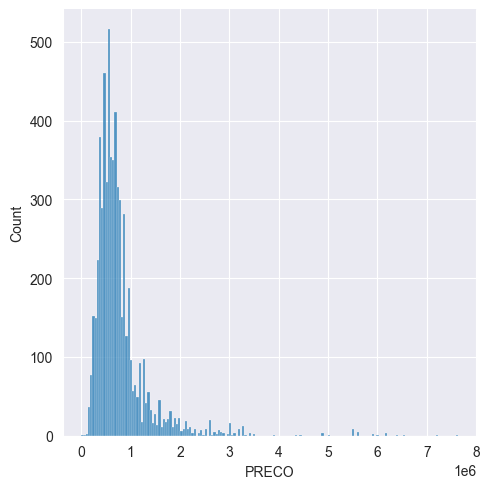

In [41]:
plt.figure(figsize= (10,6))
sns.displot(df['PRECO'])

<AxesSubplot: xlabel='PRECO', ylabel='AREA'>

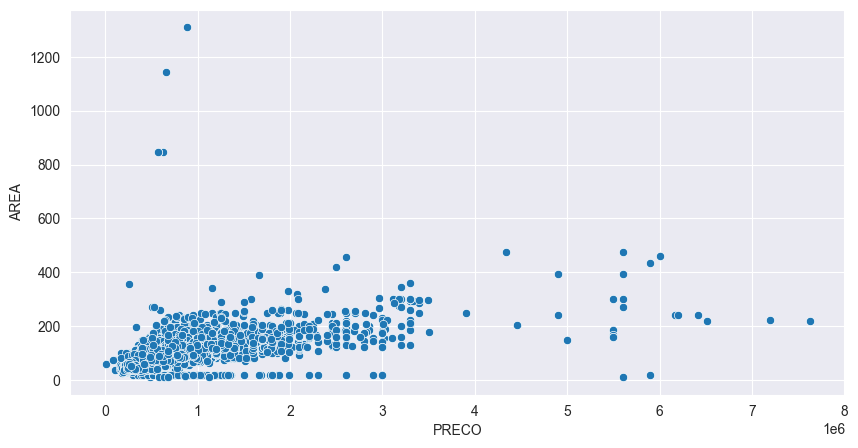

In [45]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'PRECO',y = 'AREA' ,data = df)

<AxesSubplot: xlabel='PRECO'>

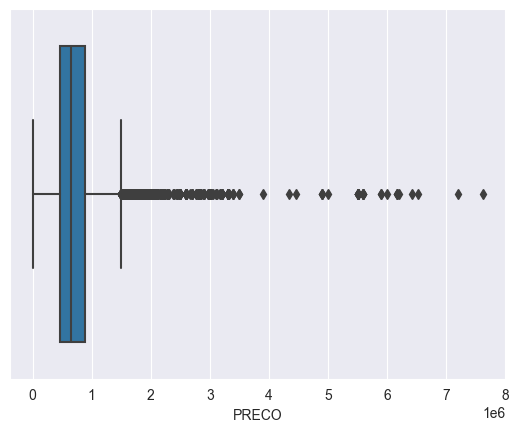

In [14]:
sns.boxplot(x='PRECO', data=df)

<AxesSubplot: xlabel='QUARTOS', ylabel='PRECO'>

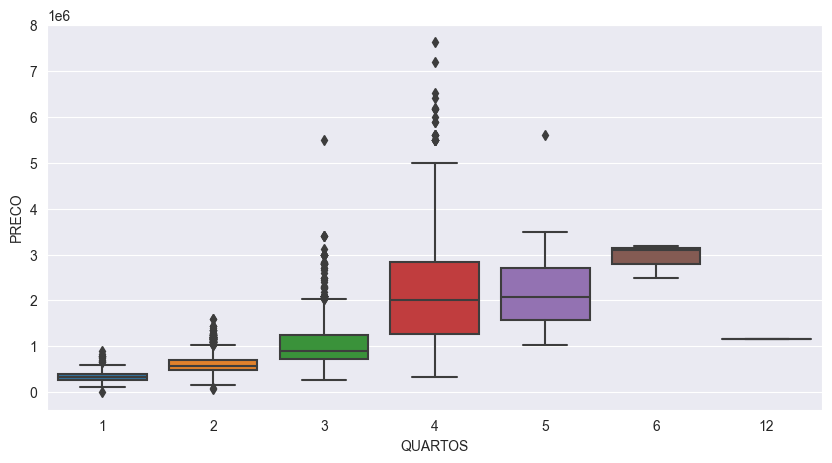

In [46]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'QUARTOS', y ='PRECO',data = df)

<AxesSubplot: xlabel='PRECO'>

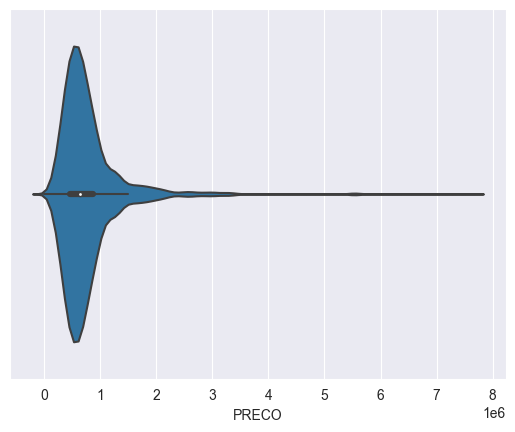

In [15]:
sns.violinplot(x='PRECO', data=df)

/var/folders/m_/60nwkd1s0mg9hkp28nc5q0xr0000gn/T/ipykernel_4836/2864181571.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
/var/folders/m_/60nwkd1s0mg9hkp28nc5q0xr0000gn/T/ipykernel_4836/2864181571.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=0.2, mask=mask)


<AxesSubplot: >

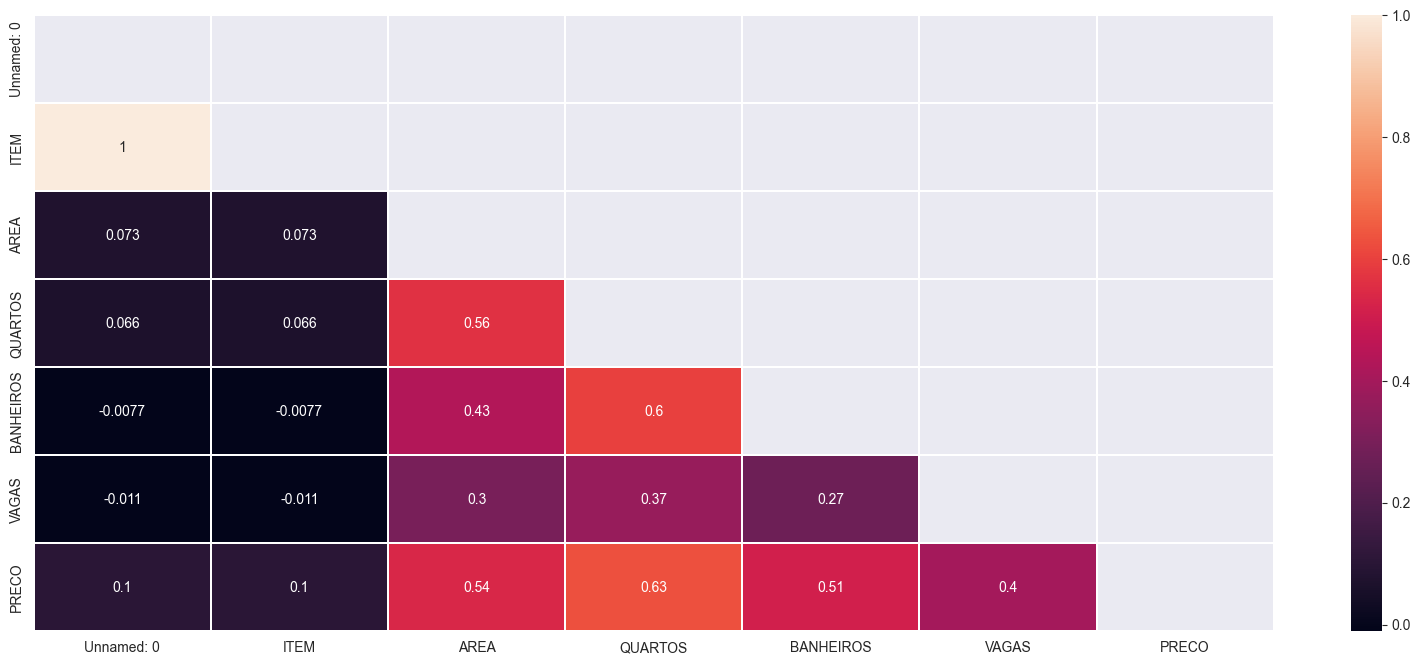

In [33]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, linewidths=0.2, mask=mask)